# Waze User Churn Analysis Project

# Step1:Data collection and Exploration

In [1]:
# Import necessary libraries
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, mean_squared_error, r2_score
from imblearn.over_sampling import SMOTE
from sklearn.datasets import load_iris
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, cross_val_score


In [2]:
# Load the dataset
df=pd.read_csv("waze_dataset - waze_dataset.csv",encoding='unicode_escape')
df

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14994,14994,retained,60,55,207.875622,140,317,0,2890.496901,2186.155708,25,17,iPhone
14995,14995,retained,42,35,187.670313,2505,15,10,4062.575194,1208.583193,25,20,Android
14996,14996,retained,273,219,422.017241,1873,17,0,3097.825028,1031.278706,18,17,iPhone
14997,14997,churned,149,120,180.524184,3150,45,0,4051.758549,254.187763,6,6,iPhone


In [5]:
# Display the FIRST few(5) rows of the dataset
df.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


The necessary libraries are imported, and the dataset is loaded from a CSV file. The first few rows are displayed using df.head().





In [8]:
# Checking the structure and data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [10]:
# Summary statistics of the numerical columns
df.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


In [12]:
# check for missing value
df.isnull().sum()

ID                           0
label                      700
sessions                     0
drives                       0
total_sessions               0
n_days_after_onboarding      0
total_navigations_fav1       0
total_navigations_fav2       0
driven_km_drives             0
duration_minutes_drives      0
activity_days                0
driving_days                 0
device                       0
dtype: int64

In [14]:
# for sum of duplicate value
df.duplicated().sum()

0

 Data exploration:


df.info() shows the column names, data types, and non-null counts.
df.describe() provides summary statistics for numerical columns.
df.isnull().sum() checks for missing values.
df.duplicated().sum() checks for duplicate rows (result: 0, meaning no duplicates).

# Step2: Data Cleaning and Transformation


In [18]:
# Fill missing values in categorical columns with mode
categorical_columns = df.select_dtypes(include=['object', 'category']).columns
df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode()[0]))


In [20]:
# Remove outliers using IQR method
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df

numerical_columns = df.select_dtypes(include=[np.number]).columns
for column in numerical_columns:
    df = remove_outliers(df, column)


In [22]:
# Encode categorical variables
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df['device'] = le.fit_transform(df['device'])


In [24]:
# Normalize numerical columns
scaler = StandardScaler()
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

print(df.head())

         ID  label  sessions    drives  total_sessions  \
2 -1.730311      1  0.955520  0.961659       -0.247354   
3 -1.730080      1 -0.280717 -0.313266       -0.949405   
4 -1.729849      1  0.384949  0.335786        0.090829   
5 -1.729618      1  0.936501  1.147102        1.241016   
6 -1.729387      1 -1.155592 -1.194124        0.798508   

   n_days_after_onboarding  total_navigations_fav1  total_navigations_fav2  \
2                 0.896260               -0.931119               -0.742600   
3                -1.734240                2.082631               -0.485183   
4                -0.190468                0.622553               -0.558731   
5                 0.882289               -0.931119               -0.742600   
6                -1.389960                0.800383               -0.080672   

   driven_km_drives  duration_minutes_drives  activity_days  driving_days  \
2         -0.299664                -0.018850      -0.163051     -0.527001   
3         -1.387652         

Missing values in categorical columns are filled with the mode.
Outliers are removed using the IQR method for numerical columns.
Categorical variables ('label' and 'device') are encoded using LabelEncoder.
Numerical columns are normalized using StandardScaler.

# Step 3:Exploratory Data Analysis(EDA):

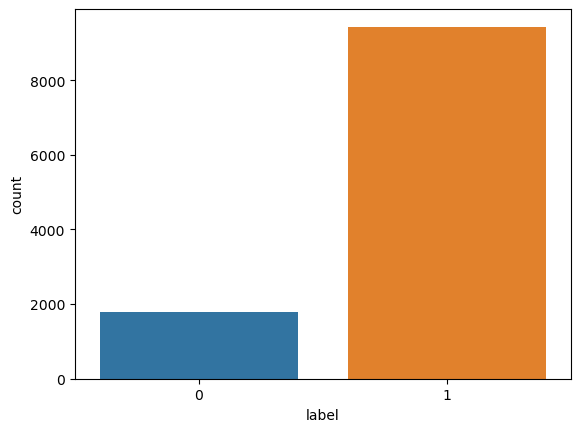

In [77]:
# Distribution of target variable
sns.countplot(x='label', data=df)
plt.show()


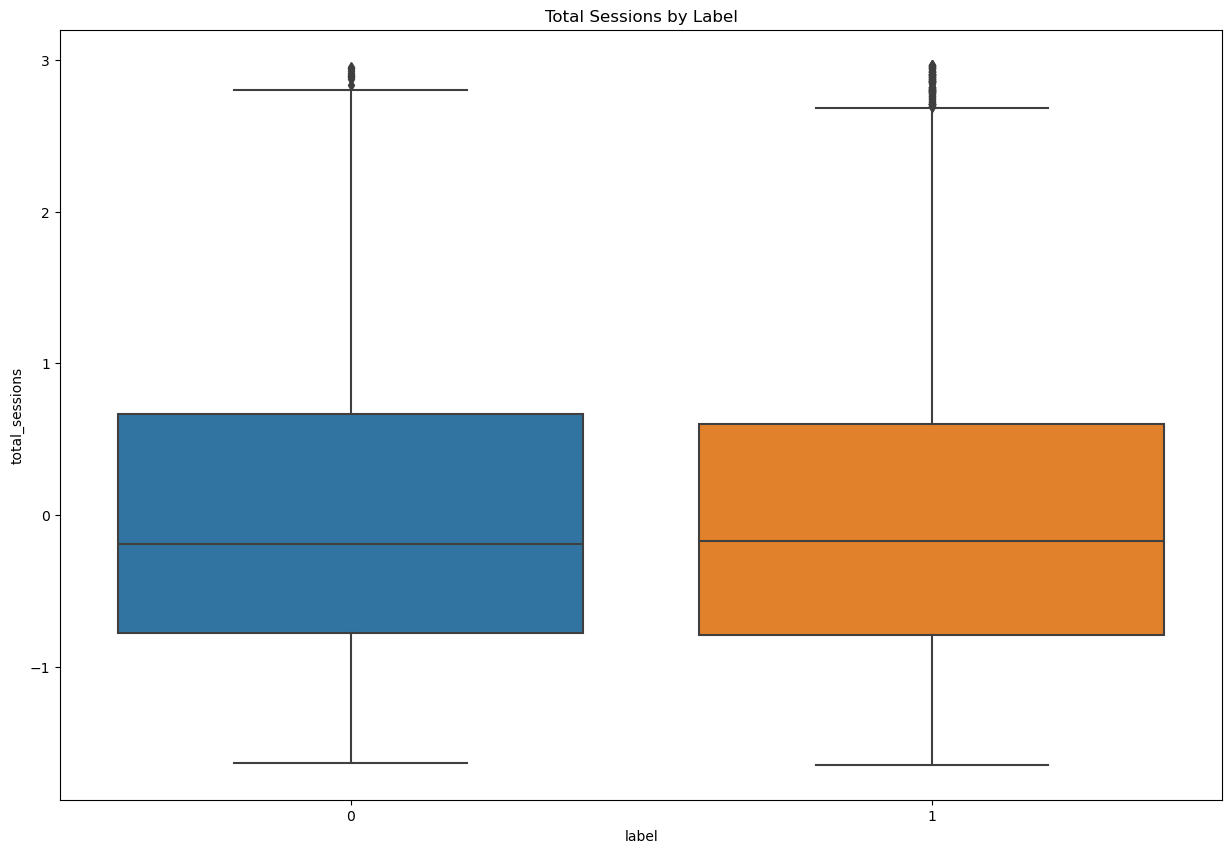

In [29]:
# Box plots for numerical features vs label
plt.figure(figsize=(15, 10))
sns.boxplot(x='label', y='total_sessions', data=df)
plt.title('Total Sessions by Label')
plt.show()

<Figure size 1500x1000 with 0 Axes>

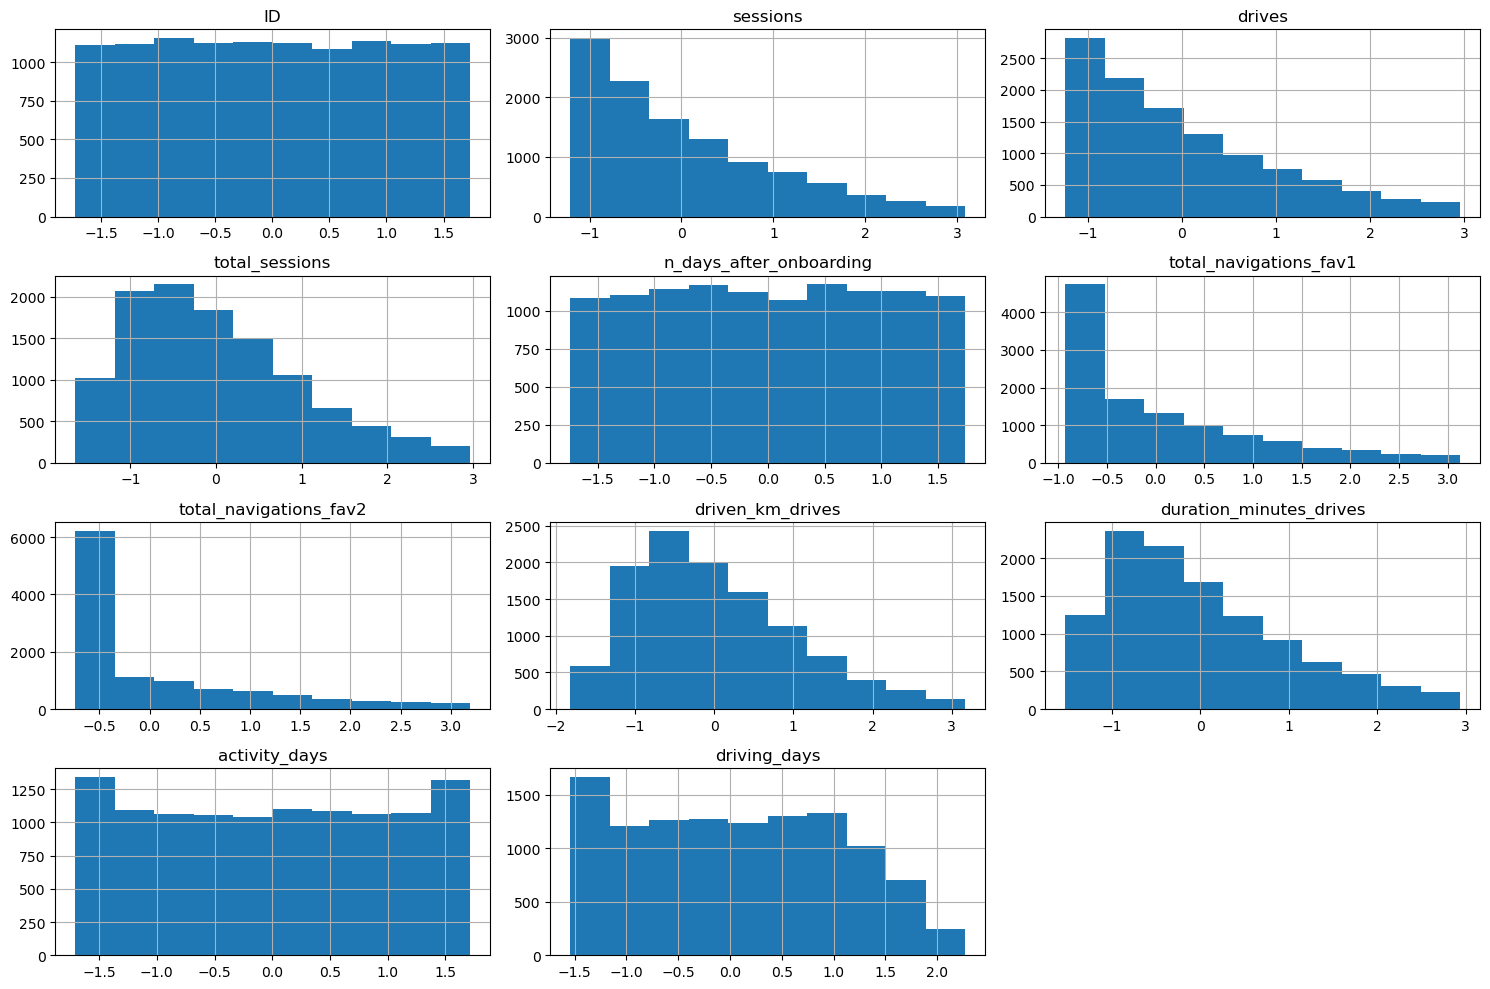

In [32]:
# Histograms for numerical features
plt.figure(figsize=(15, 10))
df[numerical_columns].hist(figsize=(15, 10))
plt.tight_layout()
plt.show()


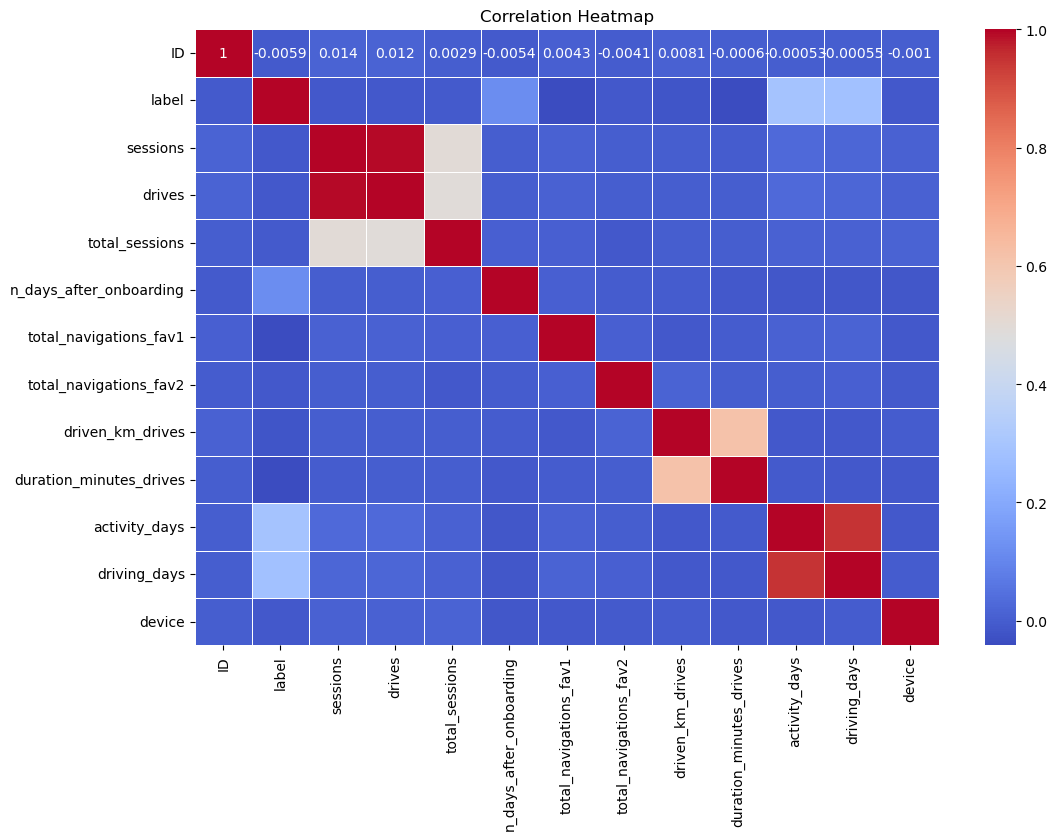

In [33]:
# Correlation heatmap
plt.figure(figsize=(12, 8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

# Step 4.Feature selection¶

In [35]:
#Correlation with target variable
correlation_with_label = df.corr()['label'].sort_values(ascending=False)
print("Correlation with label:\n", correlation_with_label)


Correlation with label:
 label                      1.000000
activity_days              0.291319
driving_days               0.283233
n_days_after_onboarding    0.118498
ID                        -0.005870
total_sessions            -0.007008
total_navigations_fav2    -0.009851
device                    -0.010305
sessions                  -0.012212
drives                    -0.012874
driven_km_drives          -0.018089
total_navigations_fav1    -0.038863
duration_minutes_drives   -0.041830
Name: label, dtype: float64


In [36]:
# Feature importance using Random Forest
X = df.drop(['ID', 'label'], axis=1)
y = df['label']


In [37]:
rf = RandomForestClassifier(random_state=42)
rf.fit(X, y)
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print("\nFeature Importance:\n", feature_importance)




Feature Importance:
                     feature  importance
3   n_days_after_onboarding    0.127967
7   duration_minutes_drives    0.113190
2            total_sessions    0.110245
6          driven_km_drives    0.109571
8             activity_days    0.104128
4    total_navigations_fav1    0.091381
9              driving_days    0.089445
1                    drives    0.087179
0                  sessions    0.086307
5    total_navigations_fav2    0.065378
10                   device    0.015210


In [39]:
# Select top features
selected_features = feature_importance['feature'][:5].tolist() + ['label']
X_selected = df[selected_features]
print("\nSelected Features:", selected_features)


Selected Features: ['n_days_after_onboarding', 'duration_minutes_drives', 'total_sessions', 'driven_km_drives', 'activity_days', 'label']


# Step5: Model Training with Selected Features

In [93]:
# Splitting data into training and test sets
from sklearn.model_selection import train_test_split

X = df.drop('label', axis=1)  # Replace with actual target column name
y = df['label']  # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training (example: Logistic Regression)
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
model.fit(X_train, y_train)

# Model evaluation
y_pred = model.predict(X_test)

# Metrics
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy}')
print(classification_report(y_test, y_pred))


Accuracy: 0.8464619492656876
              precision    recall  f1-score   support

           0       0.56      0.06      0.10       349
           1       0.85      0.99      0.92      1898

    accuracy                           0.85      2247
   macro avg       0.70      0.52      0.51      2247
weighted avg       0.81      0.85      0.79      2247



# Step 6: Model Evaluation and Hyperparameter Tuning


In [112]:
# Model Evaluation: Accuracy, Precision, Recall, F1-score, and AUC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

# Logistic Regression evaluation
y_pred_log = model.predict(X_test)
print("Logistic Regression:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_log)}")
print(f"Precision: {precision_score(y_test, y_pred_log)}")
print(f"Recall: {recall_score(y_test, y_pred_log)}")
print(f"F1-score: {f1_score(y_test, y_pred_log)}")
print(f"ROC-AUC: {roc_auc_score(y_test, y_pred_log)}")



Logistic Regression:
Accuracy: 0.8464619492656876
Precision: 0.85119855269109
Recall: 0.9915700737618546
F1-score: 0.9160379654417133
ROC-AUC: 0.5244383320098671


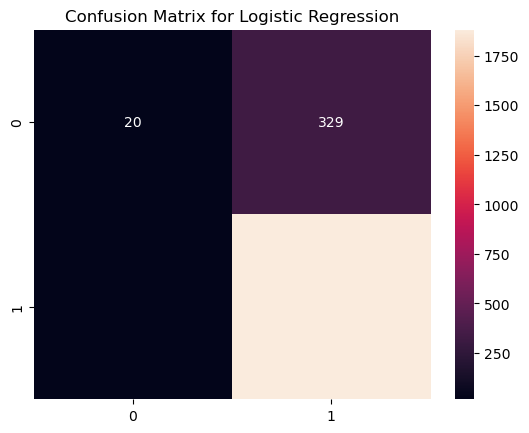

In [114]:
# Confusion Matrix for better understanding of model performance
import seaborn as sns
import matplotlib.pyplot as plt
conf_matrix = confusion_matrix(y_test, y_pred_log)
sns.heatmap(conf_matrix, annot=True, fmt='d')
plt.title("Confusion Matrix for Logistic Regression")
plt.show()

In [118]:
# Cross-validation for the best model
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
print(f"Logistic Regression Cross-Validation Scores: {cv_scores}")
print(f"Average Cross-Validation Score: {np.mean(cv_scores)}")


Logistic Regression Cross-Validation Scores: [0.83750696 0.83695047 0.83917641 0.84084585 0.83806344]
Average Cross-Validation Score: 0.8385086254869225


In [126]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression

# Define the parameter grid for Logistic Regression
param_grid_log = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'penalty': ['l2'],  # L2 regularization
    'solver': ['lbfgs', 'liblinear'],  # Solvers that support L2
    'max_iter': [100, 200, 500]  # Maximum iterations
}

# Create a GridSearchCV object
log_model = LogisticRegression()
grid_search_log = GridSearchCV(estimator=model, param_grid=param_grid_log, cv=5, scoring='accuracy', n_jobs=-1)

# Fit the GridSearchCV object
grid_search_log.fit(X_train, y_train)

# Print the best hyperparameters
print(f"Best Hyperparameters for Logistic Regression: {grid_search_log.best_params_}")
print(f"Best Cross-Validation Accuracy: {grid_search_log.best_score_}")

# Evaluate on test data
best_log_model = grid_search_log.best_estimator_
y_pred_log = best_log_model.predict(X_test)

# Print evaluation metrics
print(f"Test Accuracy: {accuracy_score(y_test, y_pred_log)}")


Best Hyperparameters for Logistic Regression: {'C': 0.1, 'max_iter': 100, 'penalty': 'l2', 'solver': 'liblinear'}
Best Cross-Validation Accuracy: 0.8388425153032832
Test Accuracy: 0.846906987093903


In [128]:
# Step 7: Interpretation and Recommendations

print("\nModel Interpretation:")
feature_importance = pd.DataFrame({'feature': X_selected.columns[:-1], 'importance': final_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)
print(feature_importance)

print("\nRecommendations:")
print("1. Focus on improving user engagement in the first few days after onboarding.")
print("2. Encourage users to increase their activity days and driving days.")
print("3. Optimize the app to provide better value during longer drives.")
print("4. Investigate why users with higher total sessions are more likely to churn and address potential issues.")
print("5. Consider personalizing the user experience based on device type.")



Model Interpretation:
                   feature  importance
4            activity_days    0.376931
0  n_days_after_onboarding    0.166912
2           total_sessions    0.154749
3         driven_km_drives    0.152029
1  duration_minutes_drives    0.149379

Recommendations:
1. Focus on improving user engagement in the first few days after onboarding.
2. Encourage users to increase their activity days and driving days.
3. Optimize the app to provide better value during longer drives.
4. Investigate why users with higher total sessions are more likely to churn and address potential issues.
5. Consider personalizing the user experience based on device type.
